In [1]:
import json


json_data = json.load(open('hw4_data.json'))
adjacency_list = {}

for node in json_data["nodes"]:
    user_name = node[0]
    adjacency_list[user_name] = {}

for edge in json_data["edges"]:
    user1, user2, weight = edge
    if user1 in adjacency_list:
        adjacency_list[user1][user2] = weight
    if user2 in adjacency_list:
        adjacency_list[user2][user1] = weight


print("邻接表:")
for user, friends in adjacency_list.items():
    print(f"{user}: {friends}")


print("\n每个用户的直接朋友：")
for user, friends in adjacency_list.items():
    direct_friends = list(friends.keys())
    print(f"{user}的直接朋友: {direct_friends}")

邻接表:
Yanyan-Wang: {'Aarebecca': 25.3, 'pomelo-nwu': 25.09, 'yangzy0603': 11.85, 'tyn1998': 9.62, 'yvonneyx': 7.39, 'lidongze0629': 7.25, 'RackweLLizm': 4.5, 'yikenie': 4.25, 'yubo0923': 3.61, 'Maple0817': 3.11, 'wj23027': 2.34, 'frank-zsy': 2.1, 'andyhuang18': 1.14, 'bifenglin': 0.86}
Aarebecca: {'Yanyan-Wang': 25.3, 'pomelo-nwu': 24.84, 'yangzy0603': 11.92, 'yvonneyx': 7.73, 'lidongze0629': 6.58, 'tyn1998': 6.4, 'RackweLLizm': 4.84, 'yikenie': 4.55, 'yubo0923': 3.82, 'Maple0817': 3.27, 'frank-zsy': 0.97}
pomelo-nwu: {'Yanyan-Wang': 25.09, 'Aarebecca': 24.84, 'yangzy0603': 13.85, 'tyn1998': 12.48, 'lidongze0629': 8.1, 'yvonneyx': 7.63, 'RackweLLizm': 4.97, 'yikenie': 4.66, 'bifenglin': 4.11, 'frank-zsy': 3.96, 'yubo0923': 3.9, 'wj23027': 3.86, 'andyhuang18': 3.56, 'Maple0817': 3.32, 'will-ww': 3.27, 'zhicheng-ning': 2.52, 'PureNatural': 2.36, 'xiaoya-yaya': 2.24, 'xgdyp': 2.1, 'longyanz': 2.1, 'Zzzzzhuzhiwei': 1.5, 'birdflyi': 1.33, 'lhbvvvvv': 1.09, 'zhaosj975': 1}
tyn1998: {'andyhuan

In [3]:
import json

json_data = json.load(open('hw4_data.json'))


adjacency_list = {}
nodes_dict = {}

for node in json_data["nodes"]:
    user_name, influence_score = node
    nodes_dict[user_name] = influence_score
    adjacency_list[user_name] = []

for edge in json_data["edges"]:
    user1, user2, _ = edge
    adjacency_list[user1].append(user2)
    adjacency_list[user2].append(user1)

# a. 计算每个用户的度数，并找出度数最多的前5个用户
degree_dict = {user: len(friends) for user, friends in adjacency_list.items()}
top_degree_users = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:5]

# b. 根据影响力分数找出影响力最高的前5个用户
top_influence_users = sorted(nodes_dict.items(), key=lambda x: x[1], reverse=True)[:5]

# c. 综合考虑影响力分数和朋友数量，列出最有影响力的用户
def calculate_influence_score(user, degree_score=0.5, influence_score=0.5):
    degree = degree_dict.get(user, 0)
    influence = nodes_dict.get(user, 0)
    return influence * influence_score + degree * degree_score

influence_dict = {user: calculate_influence_score(user) for user in nodes_dict}
top_influential_users = sorted(influence_dict.items(), key=lambda x: x[1], reverse=True)[:5]

# 打印结果
print("度数最多的前5个用户及其朋友数量:")
for user, degree in top_degree_users:
    print(f"{user}: {degree} 个朋友")

print("\n影响力最高的前5个用户:")
for user, influence in top_influence_users:
    print(f"{user}: {influence} 影响力分数")

print("\n最有影响力的用户（综合考虑影响力分数和朋友数量）:")
for user, influence in top_influential_users:
    print(f"{user}: {influence} 综合影响力分数")

度数最多的前5个用户及其朋友数量:
tyn1998: 30 个朋友
frank-zsy: 30 个朋友
pomelo-nwu: 24 个朋友
andyhuang18: 23 个朋友
wj23027: 23 个朋友

影响力最高的前5个用户:
Yanyan-Wang: 50.95 影响力分数
Aarebecca: 23.82 影响力分数
pomelo-nwu: 22.36 影响力分数
tyn1998: 16.64 影响力分数
frank-zsy: 15.8 影响力分数

最有影响力的用户（综合考虑影响力分数和朋友数量）:
Yanyan-Wang: 32.475 综合影响力分数
tyn1998: 23.32 综合影响力分数
pomelo-nwu: 23.18 综合影响力分数
frank-zsy: 22.9 综合影响力分数
Aarebecca: 17.41 综合影响力分数


In [5]:
import json

# 读取 JSON 数据
with open('hw4_data.json', 'r') as file:
    json_data = json.load(file)

# 初始化邻接表和节点字典
adjacency_list = {}
nodes_dict = {}

# 填充邻接表和节点字典
for node in json_data["nodes"]:
    user_name, influence_score = node
    nodes_dict[user_name] = influence_score
    adjacency_list[user_name] = {}

for edge in json_data["edges"]:
    user1, user2, weight = edge
    if user1 in adjacency_list:
        adjacency_list[user1][user2] = weight
    if user2 in adjacency_list:
        adjacency_list[user2][user1] = weight

# 打印邻接表
print("邻接表:")
for user, friends in adjacency_list.items():
    print(f"{user}: {friends}")

# 打印每个用户的直接朋友
print("\n每个用户的直接朋友：")
for user, friends in adjacency_list.items():
    direct_friends = list(friends.keys())
    print(f"{user}的直接朋友: {direct_friends}")

# 打印节点字典
print("\n节点字典（用户名称和影响力分数）:")
for user, influence_score in nodes_dict.items():
    print(f"{user}: {influence_score}")

邻接表:
Yanyan-Wang: {'Aarebecca': 25.3, 'pomelo-nwu': 25.09, 'yangzy0603': 11.85, 'tyn1998': 9.62, 'yvonneyx': 7.39, 'lidongze0629': 7.25, 'RackweLLizm': 4.5, 'yikenie': 4.25, 'yubo0923': 3.61, 'Maple0817': 3.11, 'wj23027': 2.34, 'frank-zsy': 2.1, 'andyhuang18': 1.14, 'bifenglin': 0.86}
Aarebecca: {'Yanyan-Wang': 25.3, 'pomelo-nwu': 24.84, 'yangzy0603': 11.92, 'yvonneyx': 7.73, 'lidongze0629': 6.58, 'tyn1998': 6.4, 'RackweLLizm': 4.84, 'yikenie': 4.55, 'yubo0923': 3.82, 'Maple0817': 3.27, 'frank-zsy': 0.97}
pomelo-nwu: {'Yanyan-Wang': 25.09, 'Aarebecca': 24.84, 'yangzy0603': 13.85, 'tyn1998': 12.48, 'lidongze0629': 8.1, 'yvonneyx': 7.63, 'RackweLLizm': 4.97, 'yikenie': 4.66, 'bifenglin': 4.11, 'frank-zsy': 3.96, 'yubo0923': 3.9, 'wj23027': 3.86, 'andyhuang18': 3.56, 'Maple0817': 3.32, 'will-ww': 3.27, 'zhicheng-ning': 2.52, 'PureNatural': 2.36, 'xiaoya-yaya': 2.24, 'xgdyp': 2.1, 'longyanz': 2.1, 'Zzzzzhuzhiwei': 1.5, 'birdflyi': 1.33, 'lhbvvvvv': 1.09, 'zhaosj975': 1}
tyn1998: {'andyhuan

In [4]:

# 用户Yanyan-Wang的直接朋友
yanyan_friends = adjacency_list.get("Yanyan-Wang", [])

# Yanyan-Wang的朋友的朋友
friends_of_friends = set()
for friend in yanyan_friends:
    friends_of_friends.update(adjacency_list.get(friend, []))

# 移除Yanyan-Wang自己和她的直接朋友
potential_friends = friends_of_friends - set(yanyan_friends) - {"Yanyan-Wang"}

# 计算共同朋友数量
common_friends_count = {friend: 0 for friend in potential_friends}
for friend in yanyan_friends:
    for potential_friend in potential_friends:
        if potential_friend in adjacency_list.get(friend, []):
            common_friends_count[potential_friend] += 1

# 找出共同朋友最多的朋友的朋友
recommended_friend = max(common_friends_count, key=common_friends_count.get)
print(f"推荐的新朋友: {recommended_friend}，理由: 与Yanyan-Wang有最多的共同朋友。")

# 找出与Yanyan-Wang连接强度最高的5个用户
if "Yanyan-Wang" in adjacency_list:
    top_connections = sorted(
        [(friend, weight) for friend, weight in 
         [(friend, json_data["edges"][edge_index][2]) for edge_index, edge in enumerate(json_data["edges"]) 
          if edge[0] == "Yanyan-Wang" or edge[1] == "Yanyan-Wang"]],
        key=lambda x: x[1],
        reverse=True
    )
    top_5_connections = top_connections[:5]
    print("\n与Yanyan-Wang连接强度最高的5个用户:")
    for friend, weight in top_5_connections:
        print(f"{friend}: 连接强度 {weight}")

推荐的新朋友: will-ww，理由: 与Yanyan-Wang有最多的共同朋友。

与Yanyan-Wang连接强度最高的5个用户:
bifenglin: 连接强度 25.3
bifenglin: 连接强度 25.09
bifenglin: 连接强度 11.85
bifenglin: 连接强度 9.62
bifenglin: 连接强度 7.39


C:\Users\殷瑜杰\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24433 (\N{CJK UNIFIED IDEOGRAPH-5F71}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\殷瑜杰\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21709 (\N{CJK UNIFIED IDEOGRAPH-54CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\殷瑜杰\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21147 (\N{CJK UNIFIED IDEOGRAPH-529B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\殷瑜杰\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24471 (\N{CJK UNIFIED IDEOGRAPH-5F97}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\殷瑜杰\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: User

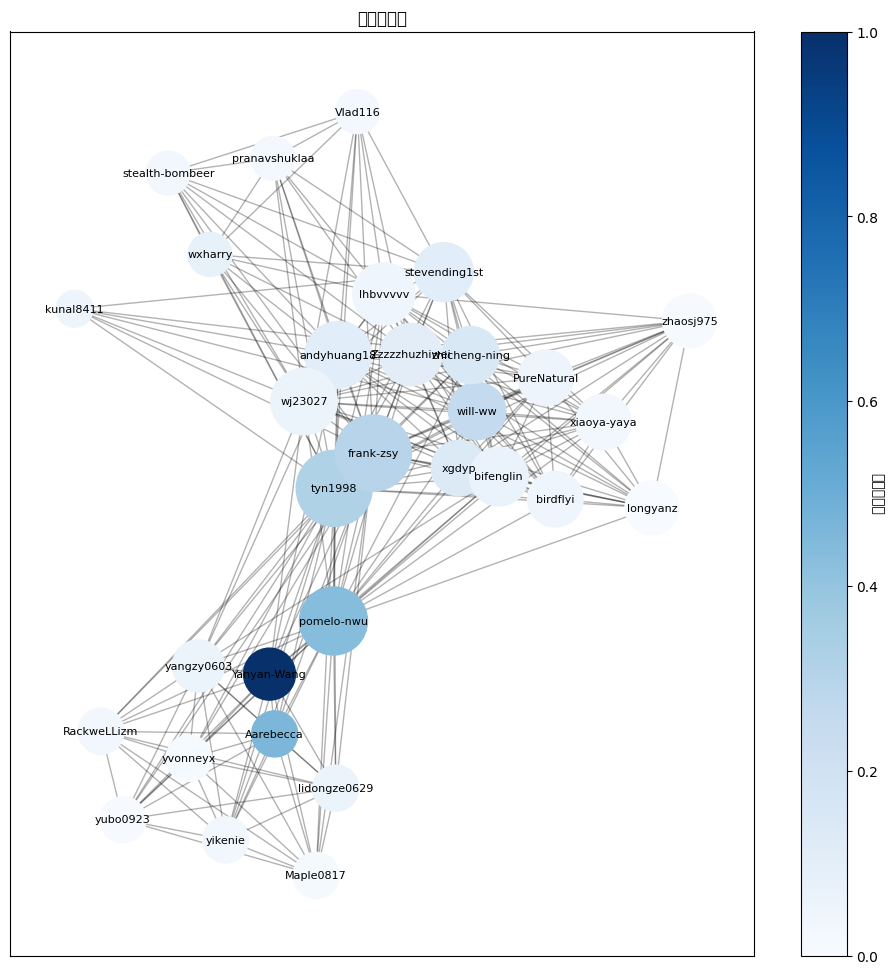

In [8]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# 读取 JSON 数据
with open('hw4_data.json', 'r') as file:
    json_data = json.load(file)

# 创建图
G = nx.Graph()

# 添加节点和节点属性（影响力得分）
nodes_dict = {}
for node in json_data["nodes"]:
    user_name, influence_score = node
    nodes_dict[user_name] = influence_score
    G.add_node(user_name, influence=influence_score)

# 添加边
for edge in json_data["edges"]:
    user1, user2, weight = edge
    G.add_edge(user1, user2, weight=weight)

# 计算每个节点的度数
degrees = {node: G.degree(node) for node in G.nodes()}
# 准备绘图
pos = nx.spring_layout(G)  # 使用Spring布局
plt.figure(figsize=(12, 12))

# 绘制节点
node_colors = [G.nodes[data]['influence'] for data in G.nodes()]
node_sizes = [degrees[node] * 100 for node in G.nodes()]  # 节点大小乘以一个因子以便于观察
nx.draw_networkx_nodes(
    G,
    pos,
    node_color=node_colors,
    node_size=node_sizes,
    cmap=plt.cm.Blues
)

# 绘制边
nx.draw_networkx_edges(G, pos, alpha=0.3)

# 绘制节点标签
nx.draw_networkx_labels(G, pos, font_size=8)

# 标题和颜色条
plt.title("社交网络图")
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Blues), ax=plt.gca(), label='影响力得分')
cbar.set_label('影响力得分', rotation=270)

# 显示图形
plt.show()

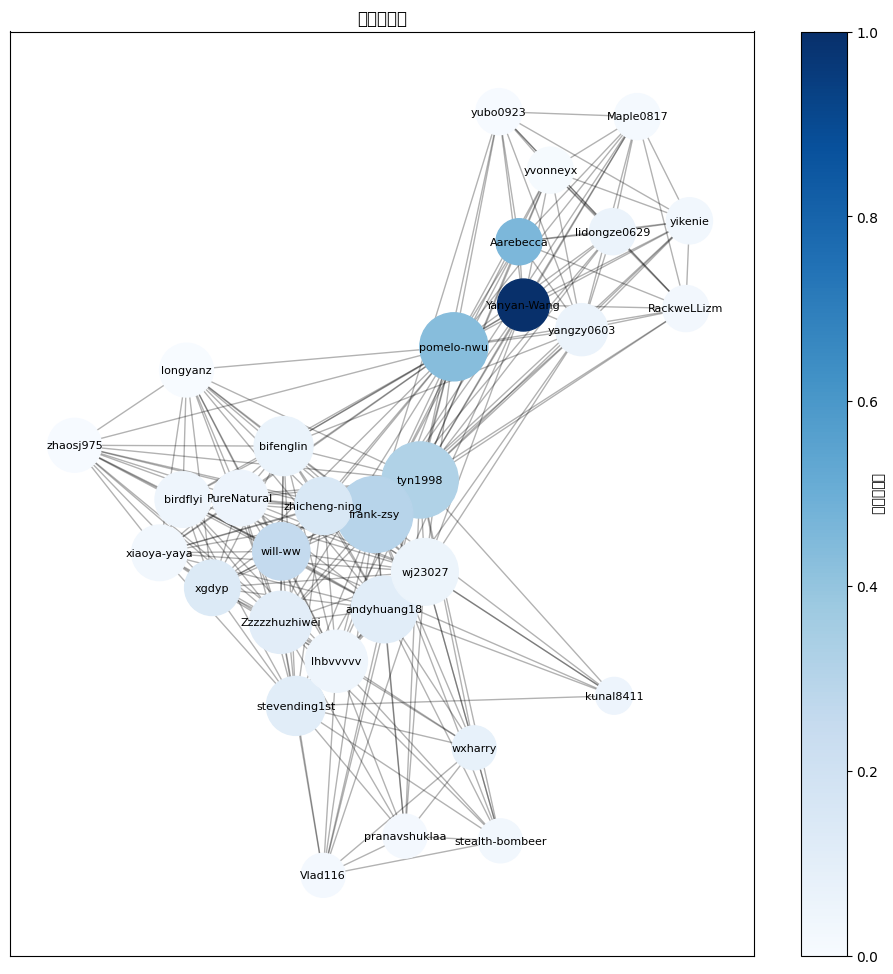

In [9]:
import json
import networkx as nx
import matplotlib.pyplot as plt


with open('hw4_data.json', 'r') as file:
    json_data = json.load(file)


# 创建图
G = nx.Graph()

# 添加节点和节点属性（影响力得分）
for node in json_data["nodes"]:
    user_name, influence_score = node
    G.add_node(user_name, influence=influence_score)

# 添加边
for edge in json_data["edges"]:
    user1, user2, weight = edge
    G.add_edge(user1, user2, weight=weight)

# 计算每个节点的度数
degrees = {node: G.degree(node) for node in G.nodes()}

# 准备绘图
pos = nx.spring_layout(G)  # 使用Spring布局
plt.figure(figsize=(12, 12))

# 绘制节点
node_colors = [G.nodes[data]['influence'] for data in G.nodes()]
node_sizes = [degrees[node] * 100 for node in G.nodes()]  # 节点大小乘以一个因子以便于观察
nx.draw_networkx_nodes(
    G,
    pos,
    node_color=node_colors,
    node_size=node_sizes,
    cmap=plt.cm.Blues
)

# 绘制边
nx.draw_networkx_edges(G, pos, alpha=0.3)

# 绘制节点标签
nx.draw_networkx_labels(G, pos, font_size=8)

# 标题和颜色条
plt.title("社交网络图")
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Blues), ax=plt.gca(), label='影响力得分')
cbar.set_label('影响力得分', rotation=270)

# 显示图形
plt.show()